impose a graph with a chunk representation

In [5]:
# first, test generative model on one dimensional graphs
import sys
sys.path.append('../HCM')
from Chunking_Graph import *
import seaborn as sns

In [6]:
# demonstrate the graph structure as the number of observation increases
import operator
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

plt.figure(figsize = (10,10))

def plot_chunk_graph(vertex_list, edges, location, ax=None):
    chunks = []
    for ck in vertex_list:
        chunks.append(list(np.ravel(tuple_to_arr(ck)).astype(int)))
    print('chunks ', chunks)
    print('edges ', edges)
    print('location ', location)
    #location[0] = [1,8]
    element_palette = {0:'#FFFFFF', 1:'#FFCAB1', 2:'#C1D7AE', 3:'#E885ec',4:'#85bdec',5:'#F7F726'}  # colorblind palette
    chunk_element_offset = {1: [0], 2: [-0.1, 0.1], 3: [-0.2, 0, 0.2], 4: [-0.3, -0.1, 0.1, 0.3],5:[-0.4, -0.2,0, 0.2, 0.4],6:[-0.6,-0.4, -0.2, 0, 0.2,0.4],7:[-0.6,-0.4, -0.2,0, 0.2, 0.4,0.6],8:[-0.8,-0.6,-0.4, -0.2,0,0.2, 0.4,0.6]}


    chunk_element_distance = 1.8
    if ax is None:
        f, ax = plt.subplots()

    chunks_by_length = defaultdict(list)
    for chunk in chunks:
        chunks_by_length[len(chunk)].append(chunk)
    max_width = max(len(v) for v in chunks_by_length.values())

    node_pos = {}
    for i in range(0,len(chunks)):
        chunk = chunks[i]
        chunk_id = chunks.index(chunk)
        chunk_len = len(chunks[chunk_id])
        n_on_level = len(chunks_by_length[chunk_len])
        id_on_level = chunks_by_length[chunk_len].index(chunk)
        xpos = location[i][0]
        ypos = location[i][1]
        node_pos[chunk_id] = (xpos, ypos)

    G = nx.MultiDiGraph()
    for node in range(len(chunks)):
        G.add_node(node, pos=node_pos[node])

    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=0)

    edge_color = ['k' if weight else 'grey' for weight in nx.get_edge_attributes(G,'weight').values()]

    nx.draw_networkx(G, node_pos,
                        node_color='grey',
                        node_size=0.0001,
                        #connectionstyle='arc3, rad = 0.1',
                        arrowsize=15,
                        width=3,
                        with_labels=False,
                        edge_color=edge_color,
                        alpha = 0.3,
                        ax=ax)

    for chunk_id, chunk in enumerate(chunks):

        for element_id, element in enumerate(chunk):
            ax.scatter([node_pos[chunk_id][0] + (chunk_element_offset[len(chunk)][element_id] * chunk_element_distance)],
                        [node_pos[chunk_id][1]],
                        c=element_palette[element],
                        edgecolors = 'lightgrey',
                        linewidth=3,
                        marker='s',
                        s=600
                        #zorder=5
                        )
    plt.axis("off")
    plt.show()

    return ax


<Figure size 720x720 with 0 Axes>

In [7]:
def impose_representation():
    cg = Chunking_Graph()
    E = np.zeros([1,1,1])
    A = np.array([[[1]]])
    B = np.array([[[2]]])
    C = np.array([[[3]]])
    D = np.array([[[4]]])
    AB = np.array([[[1]], [[2]]]) #
    CA = np.array([[[3]], [[1]]]) #
    ABCA = np.array([[[1]], [[2]], [[3]], [[1]]]) #
    CAD = np.array([[[3]], [[1]], [[4]]]) #
    ABCACAD = np.array([[[1]], [[2]], [[3]], [[1]],[[3]], [[1]], [[4]]]) #

    stim_set = [arr_to_tuple(E), arr_to_tuple(A), arr_to_tuple(B),arr_to_tuple(C), arr_to_tuple(D), arr_to_tuple(AB),
                arr_to_tuple(CA),arr_to_tuple(ABCA), arr_to_tuple(CAD)]

    '''Produce a generic generative model'''
    probs =[1/len(stim_set)]*len(stim_set)
    generative_marginals = {}
    # generative_marginals[arr_to_tuple(E)] = probs[0]
    for i in range(0, len(stim_set)):
        generative_marginals[stim_set[i]] = probs[i]
    cg.M = generative_marginals

    cg.vertex_list = stim_set
    cg.edge_list = [(1, 5), (2, 5), (1, 6), (3, 6), (5, 7), (6, 7), (6, 8), (4, 8)]
    cg.vertex_location = [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [3.0, 1], [4.0, 1], [3.5, 3], [4.5, 2]]
    return cg

representation by the graph

chunks  [[0], [1], [2], [3], [4], [1, 2], [3, 1], [1, 2, 3, 1], [3, 1, 4]]
edges  [(1, 5), (2, 5), (1, 6), (3, 6), (5, 7), (6, 7), (6, 8), (4, 8)]
location  [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [3.0, 1], [4.0, 1], [3.5, 3], [4.5, 2]]


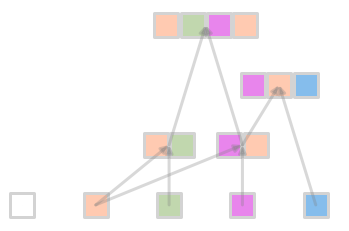

<AxesSubplot:>

In [8]:
cg = impose_representation()
plot_chunk_graph(cg.vertex_list,cg.edge_list, cg.vertex_location)

In [9]:
def generate_facilitative_env(): 
    fac_env = Chunking_Graph()
    E = np.zeros([1,1,1])
    A = np.array([[[1]]])
    B = np.array([[[2]]])
    C = np.array([[[3]]])
    D = np.array([[[4]]])
    AB = np.array([[[1]], [[2]]]) #
    CA = np.array([[[3]], [[1]]]) #
    ABCA = np.array([[[1]], [[2]], [[3]], [[1]]]) #
    CAD = np.array([[[3]], [[1]], [[4]]]) #
    ABCACAD = np.array([[[1]], [[2]], [[3]], [[1]],[[3]], [[1]], [[4]]]) #

    stim_set = [arr_to_tuple(E), arr_to_tuple(A), arr_to_tuple(B),arr_to_tuple(C), arr_to_tuple(D), arr_to_tuple(AB),
                arr_to_tuple(CA),arr_to_tuple(ABCA), arr_to_tuple(CAD), arr_to_tuple(ABCACAD)]

    '''Produce a generic generative model'''
    alpha = tuple([1 for i in range(0, len(stim_set))])  # coefficient for the flat dirichlet distribution
    probs = sorted(list(np.random.dirichlet(alpha, 1)[0]), reverse=True)
#     probs =[1/len(stim_set)]*len(stim_set)
    generative_marginals = {}
    # generative_marginals[arr_to_tuple(E)] = probs[0]
    for i in range(0, len(stim_set)):
        generative_marginals[stim_set[i]] = probs[i]
    fac_env.M = generative_marginals

    fac_env.vertex_list = stim_set
    fac_env.edge_list = [(1, 5), (2, 5), (1, 6), (3, 6), (5, 7), (6, 7), (6, 8), (4, 8), (8, 9), (7, 9)]
    fac_env.vertex_location = [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [3.0, 1], [4.0, 1], [3.5, 3], [4.5, 2], [3.0, 4]]
    return fac_env

chunks  [[0], [1], [2], [3], [4], [1, 2], [3, 1], [1, 2, 3, 1], [3, 1, 4], [1, 2, 3, 1, 3, 1, 4]]
edges  [(1, 5), (2, 5), (1, 6), (3, 6), (5, 7), (6, 7), (6, 8), (4, 8), (8, 9), (7, 9)]
location  [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [3.0, 1], [4.0, 1], [3.5, 3], [4.5, 2], [3.0, 4]]


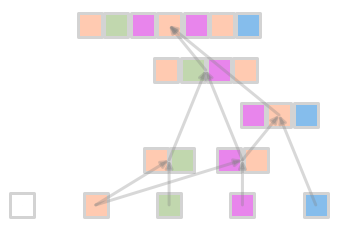

<AxesSubplot:>

In [10]:
fac_env = generate_facilitative_env()
plot_chunk_graph(fac_env.vertex_list,fac_env.edge_list, fac_env.vertex_location)

# Interfering Environment

In [11]:
def generate_interfering_env(): 
    int_env = Chunking_Graph()# interfering environment

    E = np.zeros([1,1,1])# 0
    A = np.array([[[1]]])#1
    B = np.array([[[2]]])#2
    C = np.array([[[3]]])#3
    D = np.array([[[4]]])#4 
    F = np.array([[[5]]])#5

    FD = np.array([[[5]], [[4]]]) #6
    FC = np.array([[[5]], [[3]]]) #7
    BD = np.array([[[2]], [[4]]]) #8
    DB = np.array([[[4]], [[2]]]) #9
    
    BDFD = np.array([[[2]], [[4]],[[5]], [[4]]]) #10
    BDFDDB = np.array([[[2]], [[4]],[[5]], [[4]], [[4]], [[2]]]) #11


    stim_set = [arr_to_tuple(E), arr_to_tuple(A), arr_to_tuple(B),arr_to_tuple(C), arr_to_tuple(D), arr_to_tuple(F),
                arr_to_tuple(FD),arr_to_tuple(FC), arr_to_tuple(BD), arr_to_tuple(DB), arr_to_tuple(BDFD),arr_to_tuple(BDFDDB)]

    '''Produce a generic generative model'''
#     probs =[1/len(stim_set)]*len(stim_set)
    alpha = tuple([1 for i in range(0, len(stim_set))])  # coefficient for the flat dirichlet distribution
    probs = sorted(list(np.random.dirichlet(alpha, 1)[0]), reverse=True)
    generative_marginals = {}
    # generative_marginals[arr_to_tuple(E)] = probs[0]
    for i in range(0, len(stim_set)):
        generative_marginals[stim_set[i]] = probs[i]
    int_env.M = generative_marginals

    int_env.vertex_list = stim_set
    int_env.edge_list = [(4, 6), (5, 6), (5, 7), (3, 7), (2, 8), (4, 8), (4, 9), (2, 9), (8,10),(6,10),(10,11),(9,11)]
    int_env.vertex_location = [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [5.0, 1], [4.0, 1], [3.0, 1], [2.0, 1], [4.5, 2], [5.5,3]]
    return int_env

chunks  [[0], [1], [2], [3], [4], [5], [5, 4], [5, 3], [2, 4], [4, 2], [2, 4, 5, 4], [2, 4, 5, 4, 4, 2]]
edges  [(4, 6), (5, 6), (5, 7), (3, 7), (2, 8), (4, 8), (4, 9), (2, 9), (8, 10), (6, 10), (10, 11), (9, 11)]
location  [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [5.0, 1], [4.0, 1], [3.0, 1], [2.0, 1], [4.5, 2], [5.5, 3]]


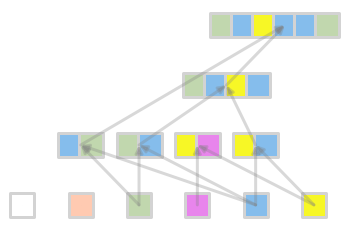

<AxesSubplot:>

In [12]:
int_env = generate_interfering_env()
plot_chunk_graph(int_env.vertex_list,int_env.edge_list, int_env.vertex_location)

In [13]:
Ns = list(np.arange(50, 1000, 50))
print(len(Ns))

19


In [31]:
from Generative_Model import *
import pandas as pd
def tuple_to_arr(tup):
    return np.array(tup)

def transferinterferenceexperiment1():
    def transfer_train_measure_KL(cg_trained, cg_test, training_sequence):
        cg_trained = learn_stc_classes(training_sequence, cg_trained)# oder learn stc classes 
        #print(cg_trained.M)
        imagined_seq_trained = cg_trained.imagination(1000, sequential=True, spatial=False, spatial_temporal=False)
        kl = evaluate_KL_compared_to_ground_truth(imagined_seq_trained, cg_test.M, Chunking_Graph(DT=0, theta=1))
        return kl
    
    cg_trained = impose_representation()
    int_env = generate_interfering_env()
    fac_env = generate_facilitative_env()
    df = {}
    df['type'] = []
    df['kl'] = []
    df['N'] = []
    df['env'] = []
    Ns = list(np.arange(50, 1000, 50))
    n_sample = 20
    for s in range(0,n_sample):
        for n in Ns:
            # train on facilitative environment
            fccg_trained = Chunking_Graph(DT=0.01, theta=0.996)
            fccg_trained.M = cg_trained.M.copy()
            fccg_trained.vertex_list = cg_trained.vertex_list.copy()
            fccg_trained.edge_list = cg_trained.edge_list.copy()
            fccg_trained.vertex_location = cg_trained.vertex_location.copy()
            fccg_trained.zero = arr_to_tuple(np.zeros([1,1,1]))
            faci_seq = generate_hierarchical_sequence(fac_env.M, s_length=n)

            naive = Chunking_Graph(DT=0.01, theta=0.996)
            klfaci = transfer_train_measure_KL(fccg_trained,fac_env,faci_seq)
            klnaivefaci = transfer_train_measure_KL(naive,fac_env,faci_seq)
            
            #print('fccg_M ', fccg_trained.M)
            #print('cg_trained ', cg_trained.M)

            # train on interfering environment 
            iccg_trained = Chunking_Graph(DT=0.01, theta=0.996)
            iccg_trained.M = cg_trained.M.copy()
            iccg_trained.vertex_list = cg_trained.vertex_list.copy()
            iccg_trained.edge_list = cg_trained.edge_list.copy()
            iccg_trained.vertex_location = cg_trained.vertex_location.copy()
            iccg_trained.zero = arr_to_tuple(np.zeros([1,1,1]))

            inte_seq = generate_hierarchical_sequence(int_env.M, s_length=n)

            naive = Chunking_Graph(DT=0.01, theta=0.996)
            klinte = transfer_train_measure_KL(iccg_trained,int_env,inte_seq)
            klnaiveinte = transfer_train_measure_KL(naive,int_env,inte_seq)

            #print('klfaci,', klfaci,' klnaivefaci ', klnaivefaci, ' klinte ', klinte, ' klnaiveinte ', klnaiveinte)
            # record data 
            df['env'] = df['env'] + ['transfer','transfer','interfere','interfere']
            df['N'] = df['N'] + [n,n,n,n]
            df['kl'] = df['kl'] + [klfaci, klnaivefaci,klinte, klnaiveinte]
            df['type'] = df['type'] + ['trained','naive','trained','naive']

    dff = pd.DataFrame.from_dict(df)
    dff.to_csv('TransferExperiment')
    return 


In [ ]:
transferinterferenceexperiment1()

[Text(0.5, 0, 'Type')]

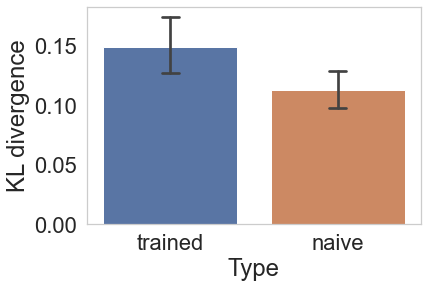

In [29]:
df = pd.read_csv('./TransferExperiment')


#df = dff
#sns.set_theme(style="ticks")
sns.set(font_scale = 2)
#palette = sns.color_palette("rocket_r")
sns.set_style("whitegrid", {'axes.grid' : False})

#df[df['env'] == 'transfer']
ax = sns.barplot(x="type", y="kl", data=df[(df['env'] == 'transfer')& (df['N']<500)],capsize=.1)
ax.set(ylabel='KL divergence')#,xlabel='Type')
ax.set(xlabel='Type')

[Text(0.5, 0, 'Type')]

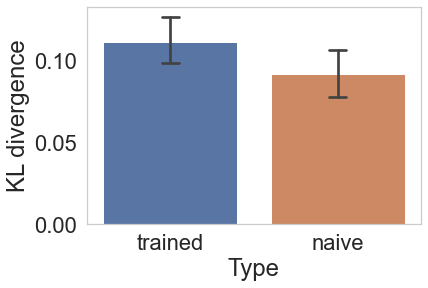

In [30]:
df = pd.read_csv('./TransferExperiment')

#sns.set_theme(style="ticks")
#df = dff
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.barplot(x="type", y="kl", data=df[(df['env'] == 'interfere')& (df['N']<=500)],capsize=.1)
ax.set(ylabel='KL divergence')
ax.set(xlabel='Type')

